<a href="https://colab.research.google.com/github/saks0106/DeepLearning_NLP/blob/main/1_Second_Hand_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

## **Data Preparation**

In [54]:
data = pd.read_csv("/content/train_2nd_Hand_cars.csv", ",")
data.head()

<ipython-input-54-313c1887b913>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("/content/train_2nd_Hand_cars.csv", ",")


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [55]:
data.shape

(1000, 12)

In [56]:
#sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [57]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [58]:
tensor_data[0]

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([1.00000e+00, 5.35651e+05, 7.98186e+05, 3.00000e+00, 7.89450e+04,
       1.00000e+00, 2.00000e+00, 1.40000e+01, 1.77000e+02, 7.30000e+01,
       1.23000e+02, 3.51318e+05], dtype=float32)>

In [59]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[8.310000e+02 5.560730e+05 7.159720e+05 6.000000e+00 8.244000e+04
  5.000000e+00 8.000000e+00 1.500000e+01 1.800000e+02 5.800000e+01
  1.010000e+02 3.206030e+05]
 [7.680000e+02 6.275690e+05 8.936490e+05 4.000000e+00 7.333200e+04
  1.000000e+00 1.000000e+00 1.400000e+01 1.990000e+02 1.110000e+02
  1.030000e+02 4.670745e+05]
 [8.860000e+02 6.305970e+05 7.917000e+05 3.000000e+00 8.393800e+04
  5.000000e+00 4.000000e+00 1.200000e+01 1.360000e+02 5.600000e+01
  1.150000e+02 3.775750e+05]
 [1.690000e+02 6.858060e+05 8.983470e+05 3.000000e+00 7.636300e+04
  4.000000e+00 8.000000e+00 8.000000e+00 1.520000e+02 1.150000e+02
  8.400000e+01 5.036065e+05]
 [3.370000e+02 5.057850e+05 8.563780e+05 2.000000e+00 6.834300e+04
  3.000000e+00 3.000000e+00 1.300000e+01 1.570000e+02 1.030000e+02
  1.050000e+02 4.082035e+05]], shape=(5, 12), dtype=float32)


In [60]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[6.0000e+00 8.2440e+04 5.0000e+00 8.0000e+00 1.5000e+01 1.8000e+02
  5.8000e+01 1.0100e+02]
 [4.0000e+00 7.3332e+04 1.0000e+00 1.0000e+00 1.4000e+01 1.9900e+02
  1.1100e+02 1.0300e+02]
 [3.0000e+00 8.3938e+04 5.0000e+00 4.0000e+00 1.2000e+01 1.3600e+02
  5.6000e+01 1.1500e+02]
 [3.0000e+00 7.6363e+04 4.0000e+00 8.0000e+00 8.0000e+00 1.5200e+02
  1.1500e+02 8.4000e+01]
 [2.0000e+00 6.8343e+04 3.0000e+00 3.0000e+00 1.3000e+01 1.5700e+02
  1.0300e+02 1.0500e+02]], shape=(5, 8), dtype=float32)


In [61]:
X.shape

TensorShape([1000, 8])

In [62]:
len(X)

1000

In [63]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[320603. ]
 [467074.5]
 [377575. ]
 [503606.5]
 [408203.5]], shape=(5, 1), dtype=float32)


In [64]:
a = tf.constant([[1,2,3,4,5],[1,2,3,4,5]])
norm1 = Normalization(axis=0,mean=10,variance=4) #axis is for x_hat
norm2 = Normalization(axis=1,mean=10,variance=4)
norm3 = Normalization(axis=-1,mean=10,variance=4)
norm4 = Normalization()
print(norm1(a))
print(norm2(a))
print(norm3(a))
print(norm4(a))


tf.Tensor(
[[-4.5 -4.  -3.5 -3.  -2.5]
 [-4.5 -4.  -3.5 -3.  -2.5]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[-4.5 -4.  -3.5 -3.  -2.5]
 [-4.5 -4.  -3.5 -3.  -2.5]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[-4.5 -4.  -3.5 -3.  -2.5]
 [-4.5 -4.  -3.5 -3.  -2.5]], shape=(2, 5), dtype=float32)
tf.Tensor(
[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]], shape=(2, 5), dtype=float32)


In [65]:
normalizer = Normalization(axis = -1, mean = 5, variance = 4)#axis=-1 is default
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [66]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [67]:
print(X.shape)

(1000, 8)


In [68]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X) #1000*0.8 = 800

In [69]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [70]:
y_train

<tf.Tensor: shape=(800, 1), dtype=float32, numpy=
array([[320603. ],
       [467074.5],
       [377575. ],
       [503606.5],
       [408203.5],
       [360410. ],
       [314149. ],
       [184900.5],
       [372595.5],
       [312469. ],
       [397183. ],
       [ 87234.5],
       [339335.5],
       [273761. ],
       [192576. ],
       [510929. ],
       [399055.5],
       [248248.5],
       [301042.5],
       [451290. ],
       [456840.5],
       [150074. ],
       [299609. ],
       [262576. ],
       [406349.5],
       [324373. ],
       [490779.5],
       [413954.5],
       [324899.5],
       [388209.5],
       [239214. ],
       [273728. ],
       [379608. ],
       [491123. ],
       [248119.5],
       [207552. ],
       [208573.5],
       [392635.5],
       [518845. ],
       [108354. ],
       [ 98489.5],
       [499121. ],
       [308643.5],
       [165595. ],
       [202702. ],
       [401011.5],
       [229982. ],
       [294502.5],
       [152879.5],
       [357294. ],


In [71]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

tf.data.Dataset is used when dataset is huge and split the data and use api's that comes with it to increase performance

In [72]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))] #X[800:900]
y_val = y[800:900]
print(X_val.shape)
print(y_val.shape)
y.shape

(100, 8)
(100, 1)


TensorShape([1000, 1])

In [73]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

1,2,3,4,5,6 \\ 2 is selected
buffer_size = 3
then 
movement will be of 3 buffer ie 1,3,4 --> 4 is selected
then
1,3,5 and so on

 reshuffle_each_iteration = True means reshuffle dataset after each epoch

In [75]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[900:]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [76]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [77]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8442127 , -0.605512  ,  1.4343686 ,  0.843994  ,  1.5035381 ,
         0.66863126, -1.2854017 , -0.1076372 ],
       [-0.31224304, -0.92038137, -1.4183218 , -1.6357365 ,  1.0577153 ,
         1.6606445 ,  1.2905047 , -0.01363095],
       [-0.8904709 , -0.5537252 ,  1.4343686 , -0.5729948 ,  0.16606963,
        -1.6286626 , -1.3826058 ,  0.5504066 ],
       [-0.8904709 , -0.8155978 ,  0.721196  ,  0.843994  , -1.6172217 ,
        -0.79328305,  1.4849128 , -0.90669036],
       [-1.4686987 , -1.0928543 ,  0.00802338, -0.92724204,  0.61189246,
        -0.5322269 ,  0.9016887 ,  0.0803753 ]], dtype=float32)>

## **Model Creation and Training**

In [78]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
___________________________________________________

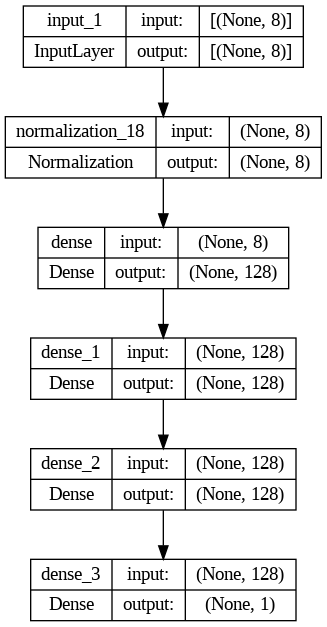

In [79]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [80]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(), #Huber(delta=0.2)
              metrics = RootMeanSquaredError())

In [81]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 6s 13ms/step - loss: 165648.3125 - root_mean_squared_error: 212303.7656 - val_loss: 59237.7148 - val_root_mean_squared_error: 73531.3359
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 58789.8945 - root_mean_squared_error: 72566.4219 - val_loss: 47349.8516 - val_root_mean_squared_error: 58892.9922
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 45648.3086 - root_mean_squared_error: 56237.8516 - val_loss: 49960.7969 - val_root_mean_squared_error: 61813.8242
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 43118.1992 - root_mean_squared_error: 53003.7773 - val_loss: 43278.4219 - val_root_mean_squared_error: 53674.8789
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 39512.5312 - root_mean_squared_error: 48843.9219 - val_loss: 54645.5117 - val_root_mean_squared_error: 65955.2188
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

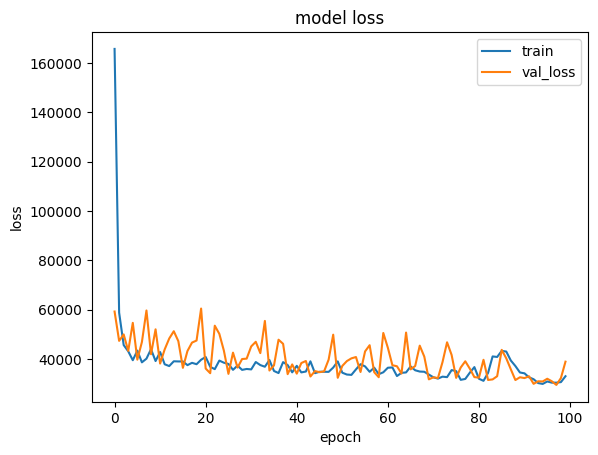

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

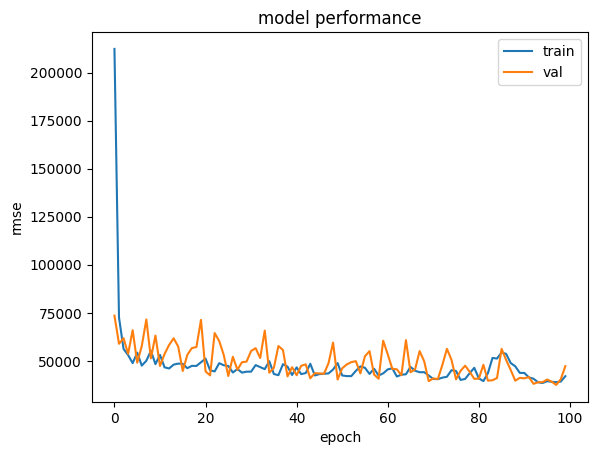

In [83]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## **Model Evaluation and Testing**

In [84]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 46553.1562 - root_mean_squared_error: 58142.8008


[46553.15625, 58142.80078125]

In [85]:
X_test.shape

TensorShape([100, 8])

In [86]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 [==============================] - 0s 85ms/step


array([[200744.5]], dtype=float32)

In [87]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([334502.], dtype=float32)>

In [88]:
y_true = list(y_test[:,0].numpy())

In [89]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[200744.53, 295115.53, 366168.47, 286781.3, 189381.45, 447144.12, 379197.2, 102789.94, 478701.16, 394404.62, 151949.73, 232955.38, 447775.12, 106201.03, 335578.34, 318841.3, 155243.28, 452890.34, 333238.34, 231744.44, 195182.23, 377220.94, 115314.914, 479988.75, 321498.53, 385392.47, 395709.22, 460785.94, 206097.25, 473580.88, 328187.25, 154592.08, 161824.92, 216868.84, 112177.17, 175850.77, 413476.12, 383521.66, 276696.62, 371673.2, 328107.47, 208439.98, 212525.7, 193863.97, 133022.7, 209899.0, 409290.25, 420841.94, 251713.48, 470027.22, 207673.98, 140032.27, 122987.71, 191469.5, 362683.94, 243811.9, 219957.72, 315664.7, 436044.22, 130300.625, 187435.44, 139646.06, 237787.75, 178841.64, 124347.516, 192729.5, 379601.8, 223043.92, 305126.4, 341912.78, 418796.66, 395194.62, 229948.47, 230196.64, 132217.45, 172714.16, 145882.38, 316581.06, 197824.53, 256024.19, 463060.5, 442843.16, 157187.23, 96620.06, 73988.766, 178538.78, 313697.47, 242

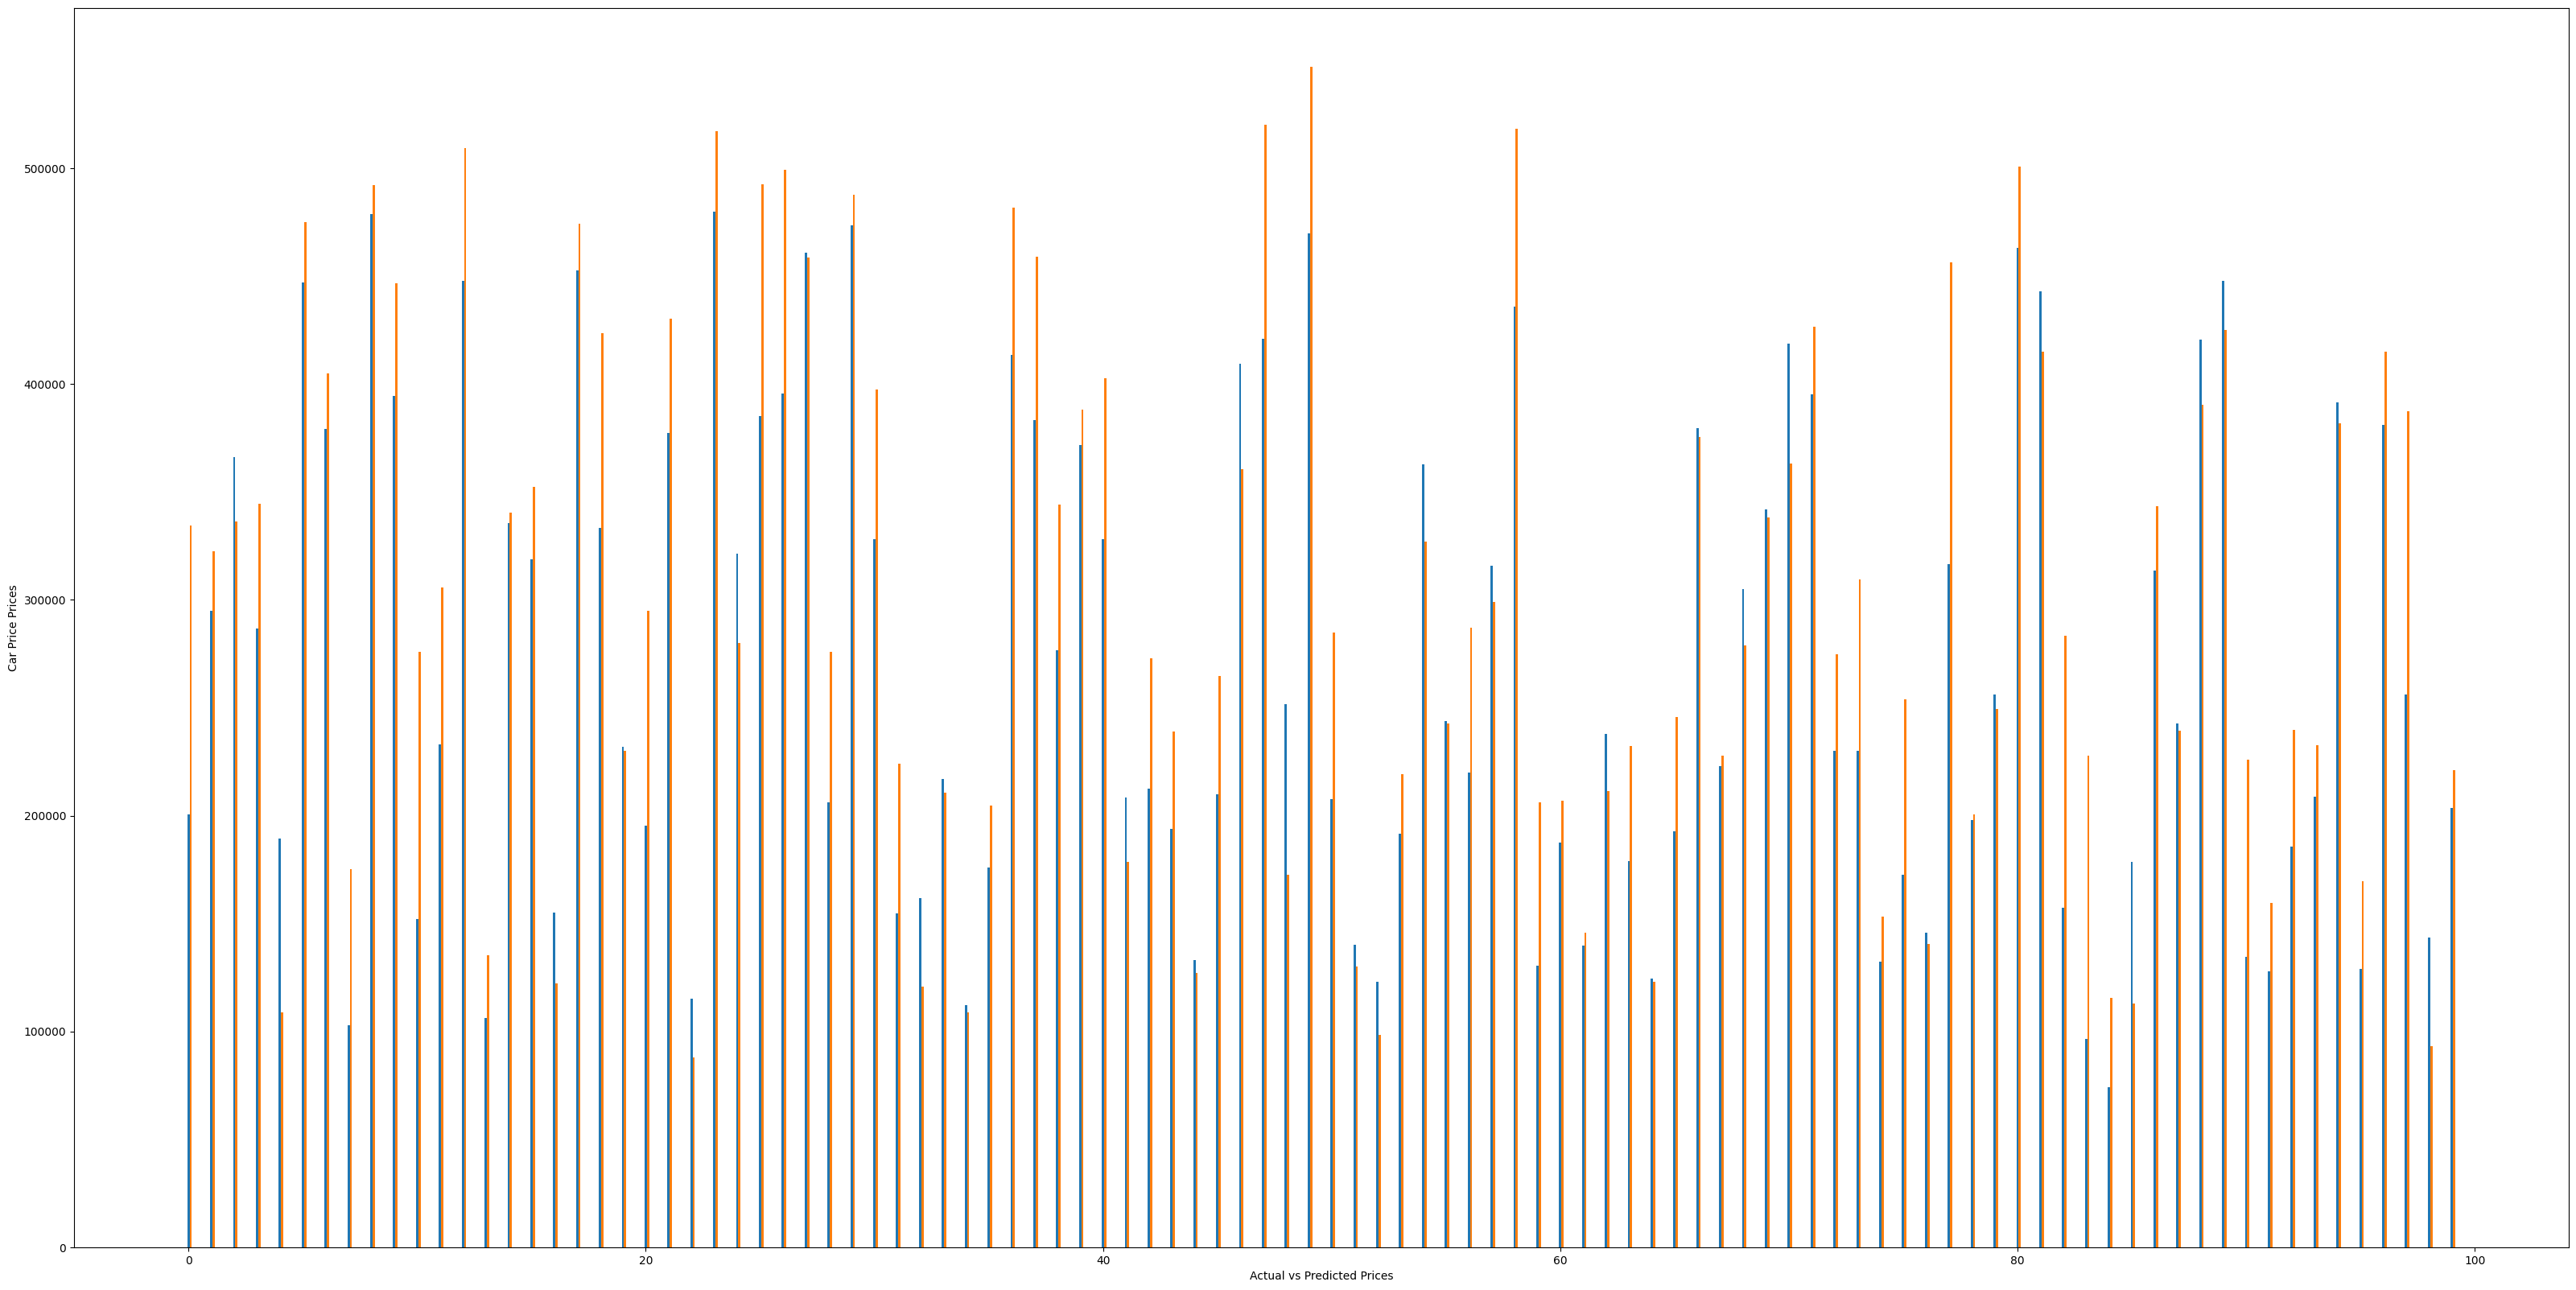

In [90]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()